<a href="https://colab.research.google.com/github/hepi1911/ML/blob/main/Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns


Dataset: https://www.kaggle.com/datasets/mansoordaku/ckdisease/data

In [ ]:
import kagglehub as kgb

# Download latest version
path = kgb.dataset_download("mansoordaku/ckdisease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ckdisease


In [ ]:
df = pd.read_csv(f'{path}/kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


EDA a prendre avec enormement de precaution ( beaucoup de valeurs et d'info ) il faudra le reduire

       Valeurs manquantes  Pourcentage (%)
rbc                   152            38.00
rc                    130            32.50
wc                    105            26.25
pot                    88            22.00
sod                    87            21.75
pcv                    70            17.50
pc                     65            16.25
hemo                   52            13.00
su                     49            12.25
sg                     47            11.75
al                     46            11.50
bgr                    44            11.00
bu                     19             4.75
sc                     17             4.25
bp                     12             3.00
age                     9             2.25
pcc                     4             1.00
ba                      4             1.00
htn                     2             0.50
dm                      2             0.50
cad                     2             0.50
appet                   1             0.25
pe         

<ipython-input-39-74db49749e93>:39: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-74db49749e93>:40: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(f'distribution_{col}.png')
<ipython-input-39-74db49749e93>:39: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-74db49749e93>:40: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(f'distribution_{col}.png')



Distribution de 'appet':
appet
good    317
poor     82
NaN       1
Name: count, dtype: int64

Distribution de 'pe':
pe
no     323
yes     76
NaN      1
Name: count, dtype: int64

Distribution de 'ane':
ane
no     339
yes     60
NaN      1
Name: count, dtype: int64

Distribution de 'classification':
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


<ipython-input-39-74db49749e93>:39: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-74db49749e93>:40: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(f'distribution_{col}.png')



Statistiques pour 'id':
count    400.000000
mean     199.500000
std      115.614301
min        0.000000
25%       99.750000
50%      199.500000
75%      299.250000
max      399.000000
Name: id, dtype: float64

Statistiques pour 'age':
count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64

Statistiques pour 'bp':
count    388.000000
mean      76.469072
std       13.683637
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64

Statistiques pour 'sg':
count    353.000000
mean       1.017408
std        0.005717
min        1.005000
25%        1.010000
50%        1.020000
75%        1.020000
max        1.025000
Name: sg, dtype: float64

Statistiques pour 'al':
count    354.000000
mean       1.016949
std        1.352679
min        0.000000
25%        0.000000
50%        0.000000
75%        2.

<ipython-input-39-74db49749e93>:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))



Statistiques pour 'bgr':
count    356.000000
mean     148.036517
std       79.281714
min       22.000000
25%       99.000000
50%      121.000000
75%      163.000000
max      490.000000
Name: bgr, dtype: float64

Statistiques pour 'bu':
count    381.000000
mean      57.425722
std       50.503006
min        1.500000
25%       27.000000
50%       42.000000
75%       66.000000
max      391.000000
Name: bu, dtype: float64

Statistiques pour 'sc':
count    383.000000
mean       3.072454
std        5.741126
min        0.400000
25%        0.900000
50%        1.300000
75%        2.800000
max       76.000000
Name: sc, dtype: float64

Statistiques pour 'sod':
count    313.000000
mean     137.528754
std       10.408752
min        4.500000
25%      135.000000
50%      138.000000
75%      142.000000
max      163.000000
Name: sod, dtype: float64

Statistiques pour 'pot':
count    312.000000
mean       4.627244
std        3.193904
min        2.500000
25%        3.800000
50%        4.400000
75%       

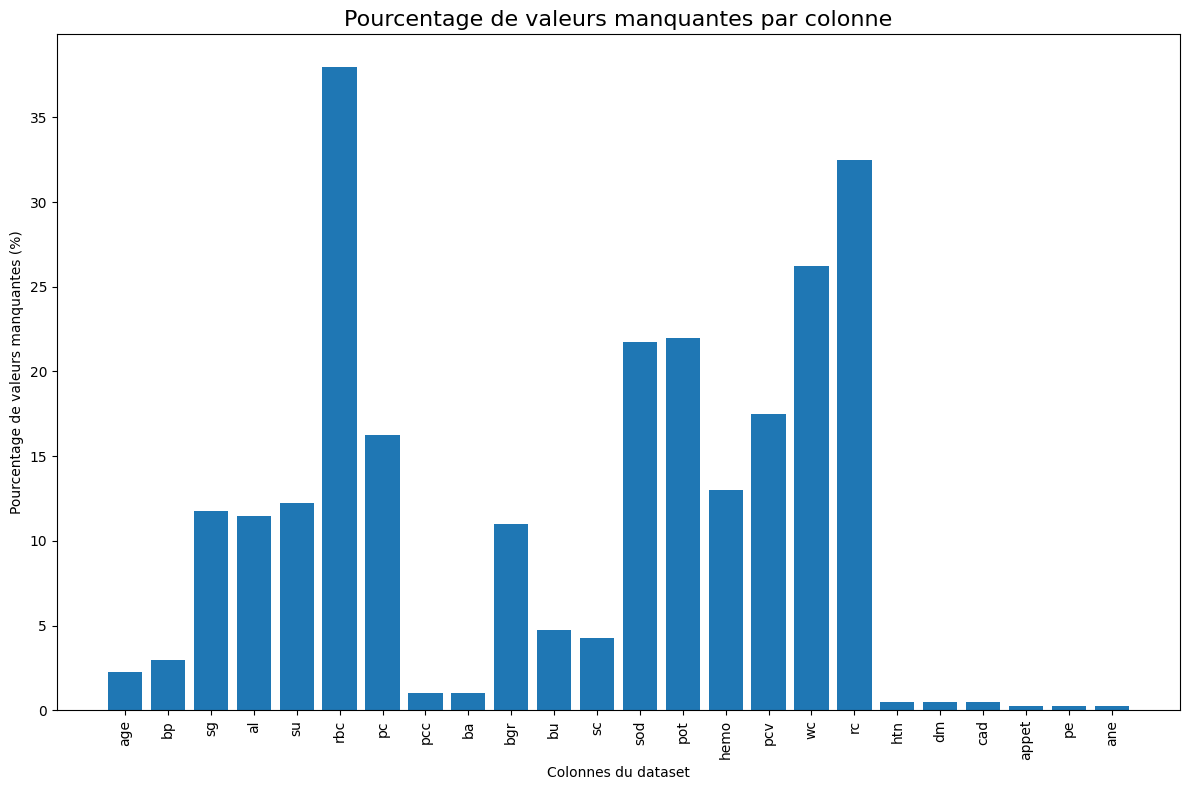

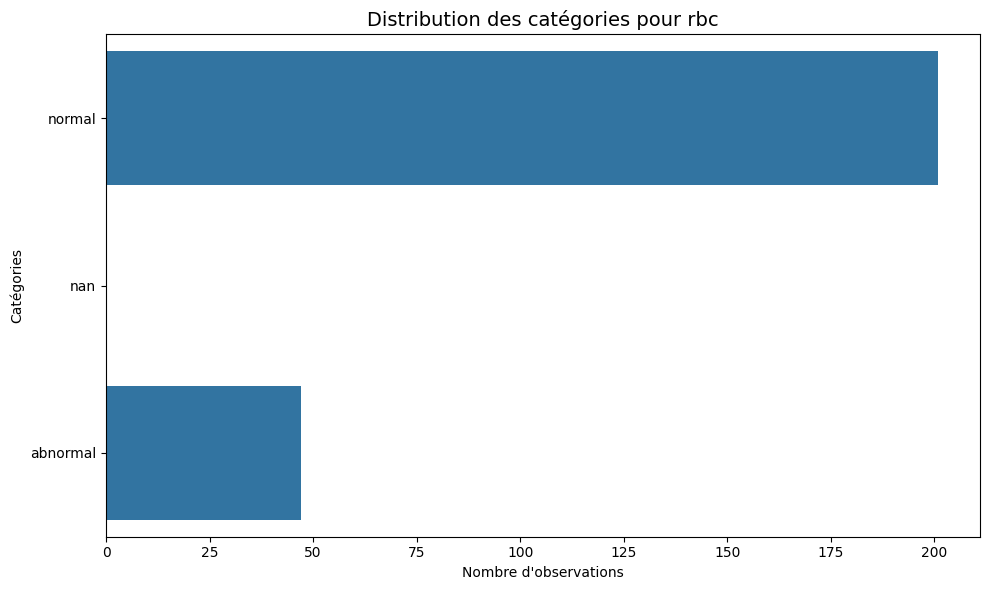

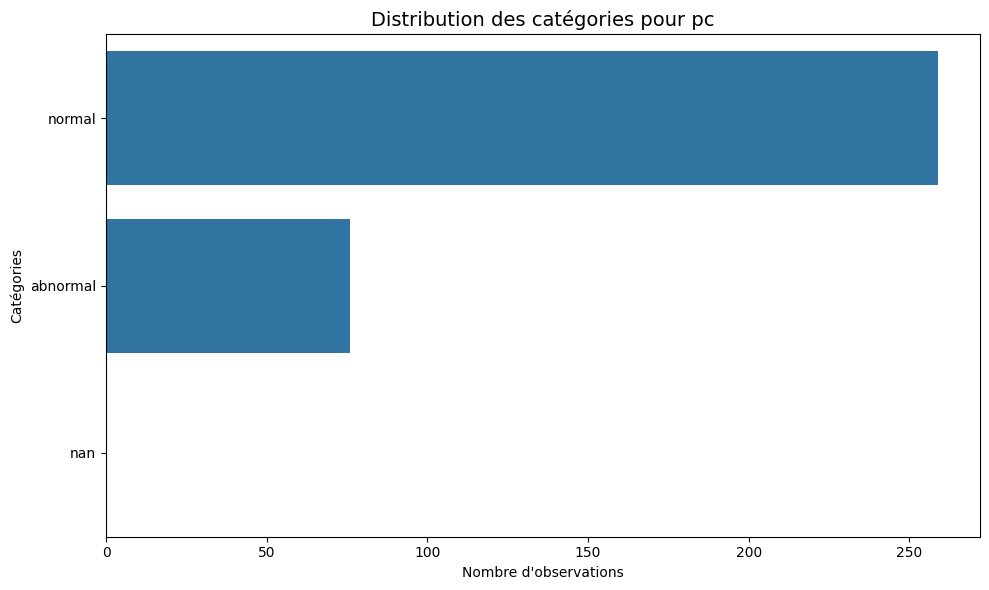

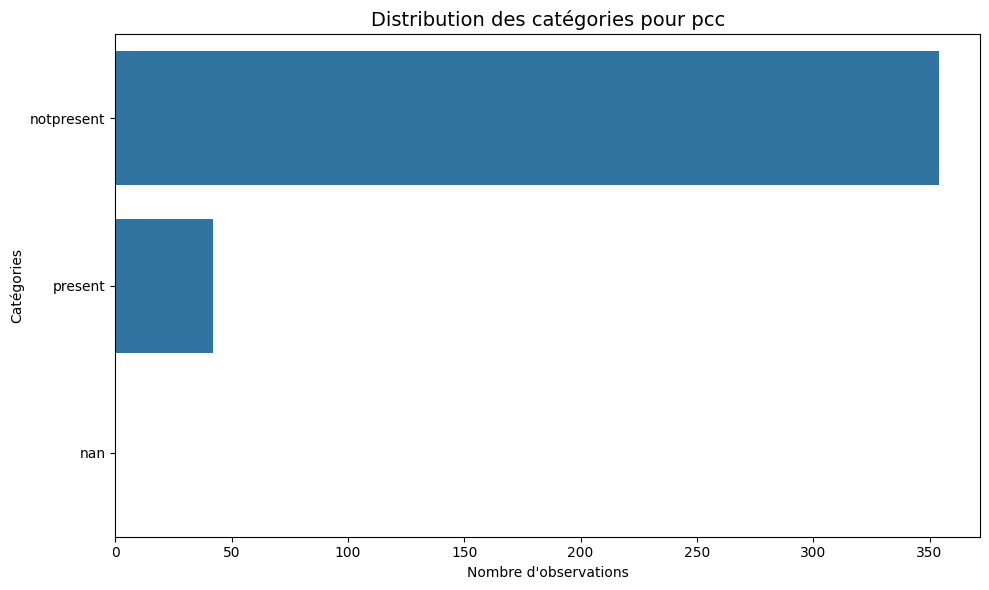

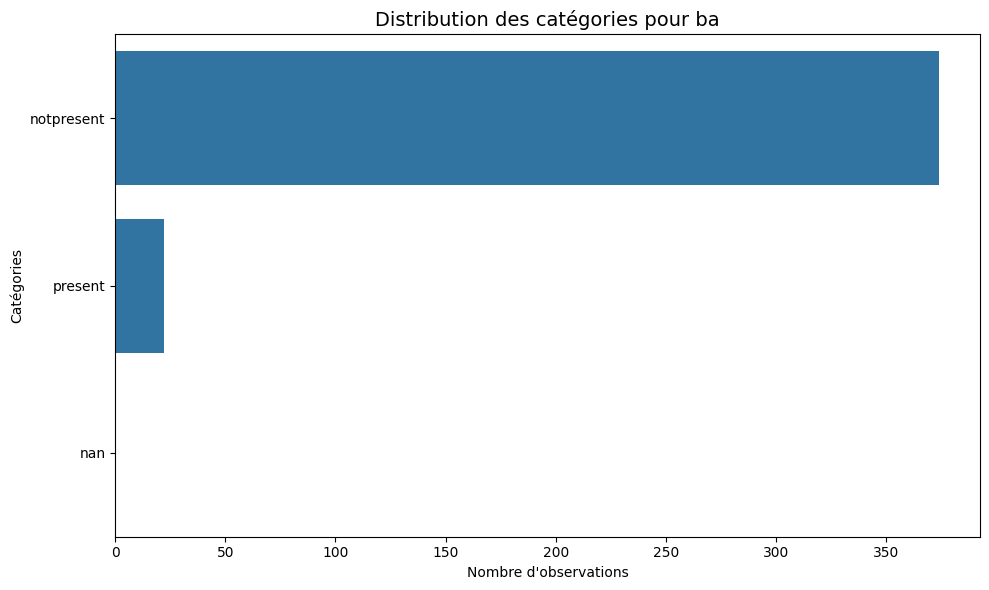

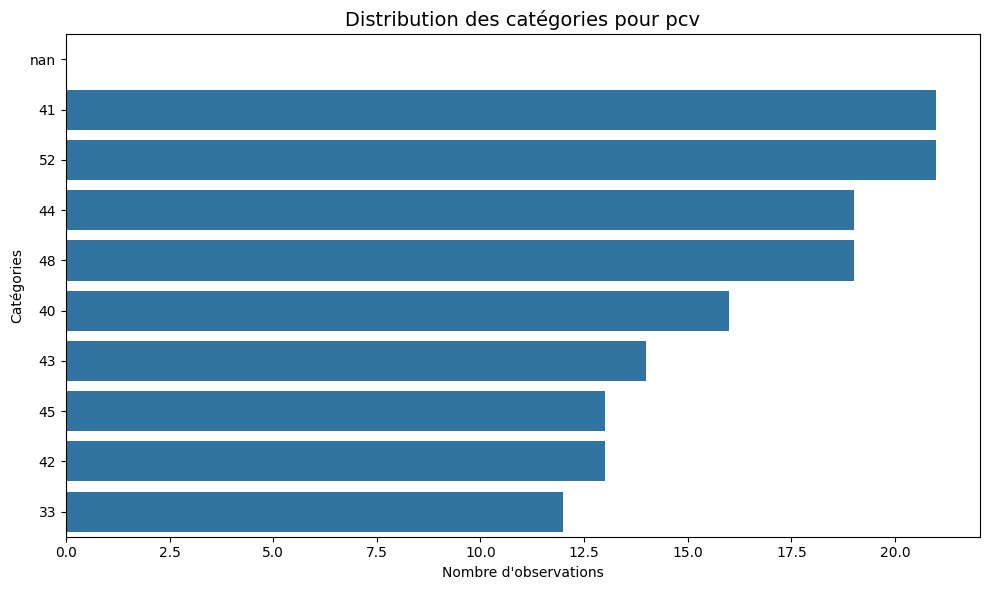

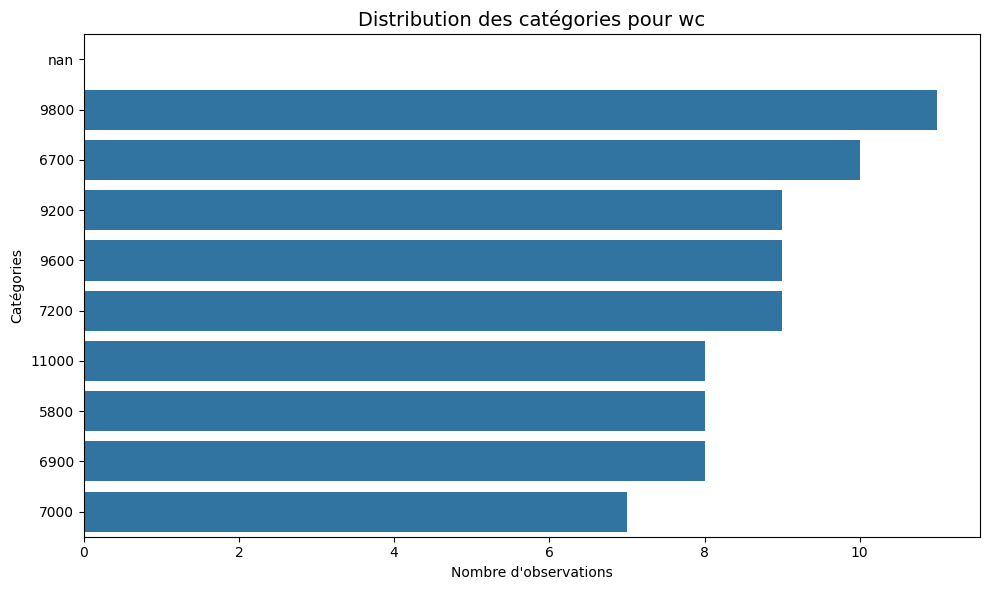

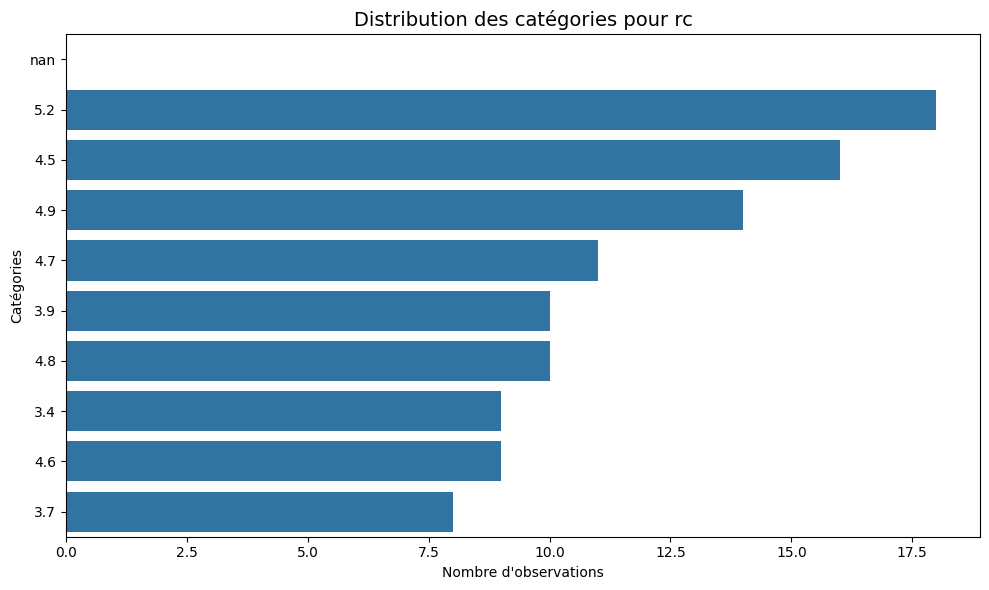

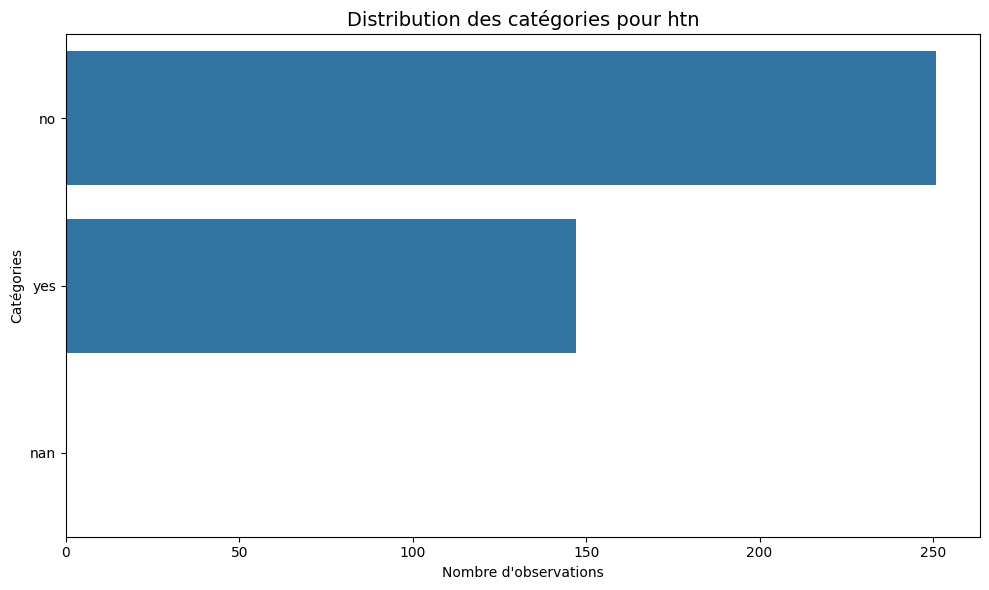

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


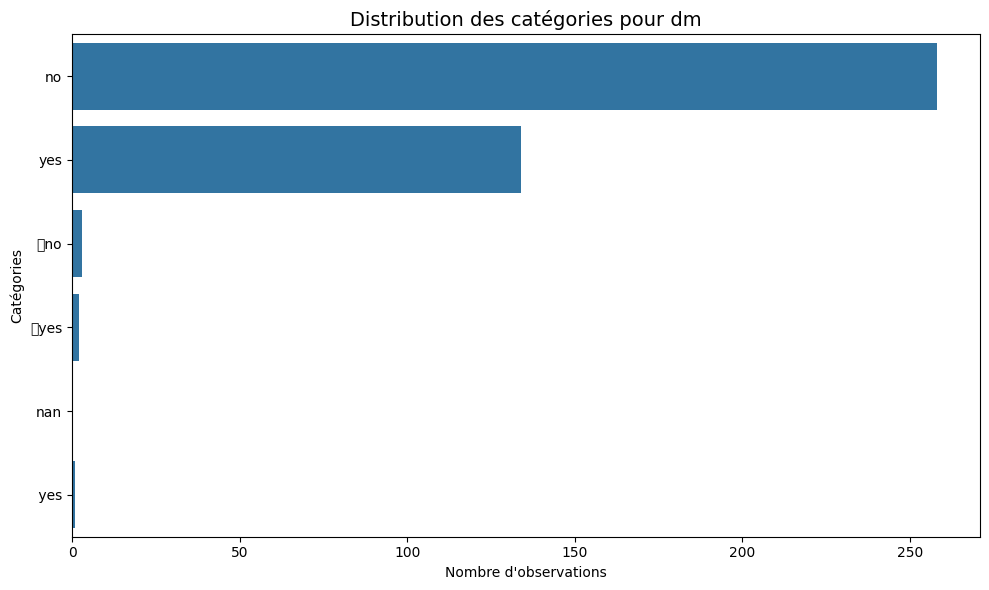

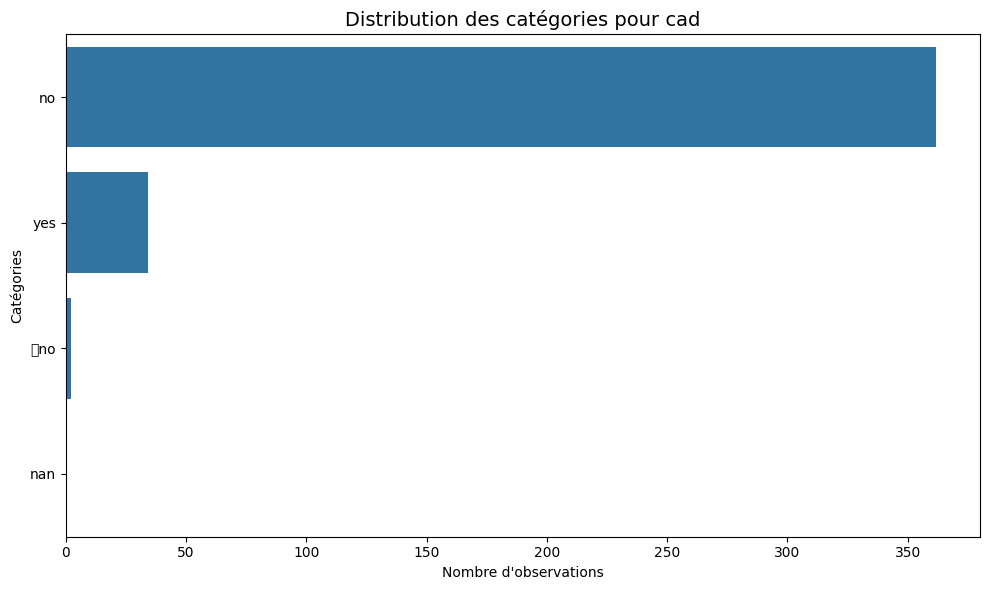

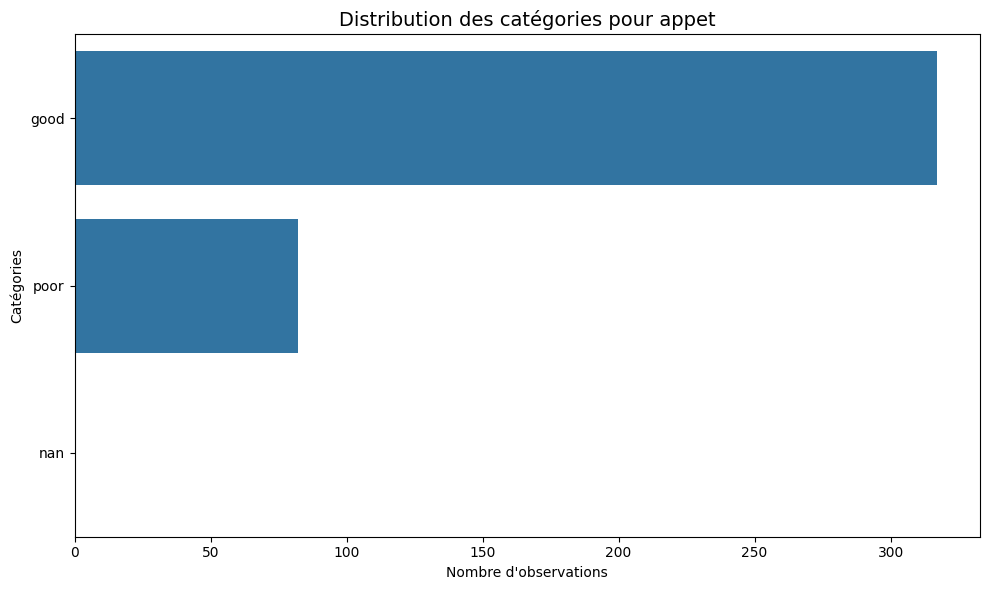

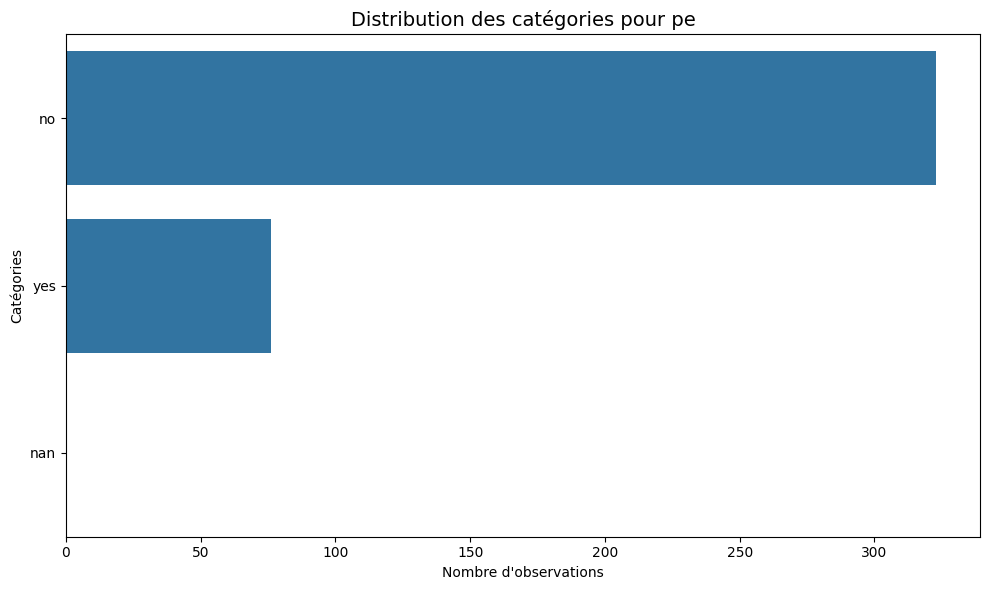

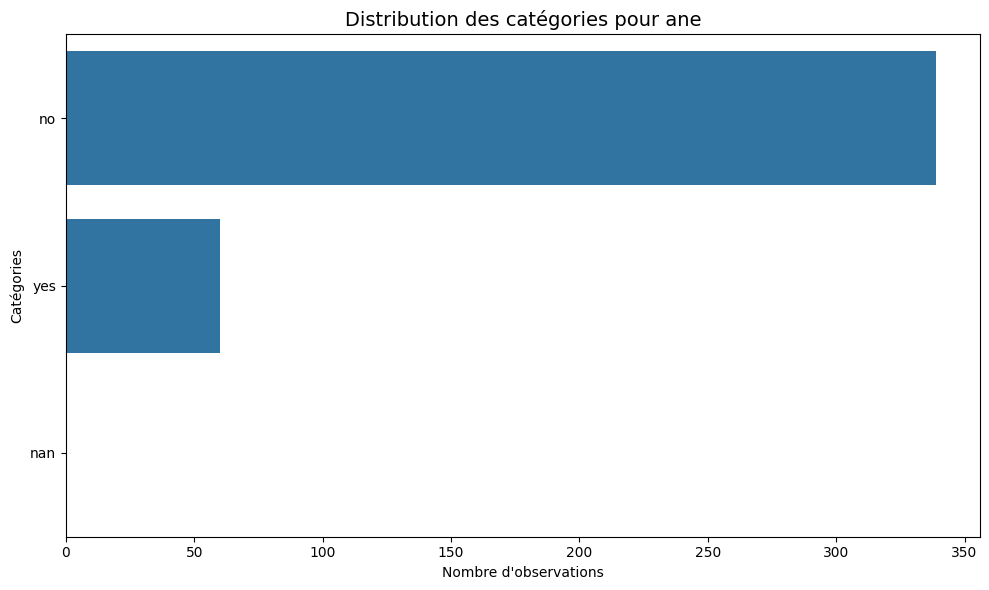

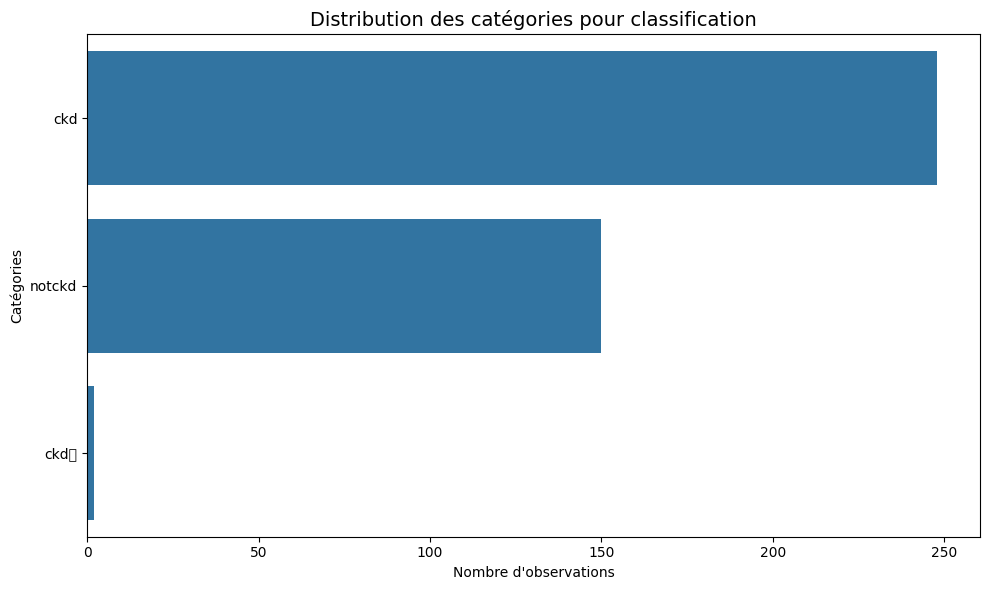

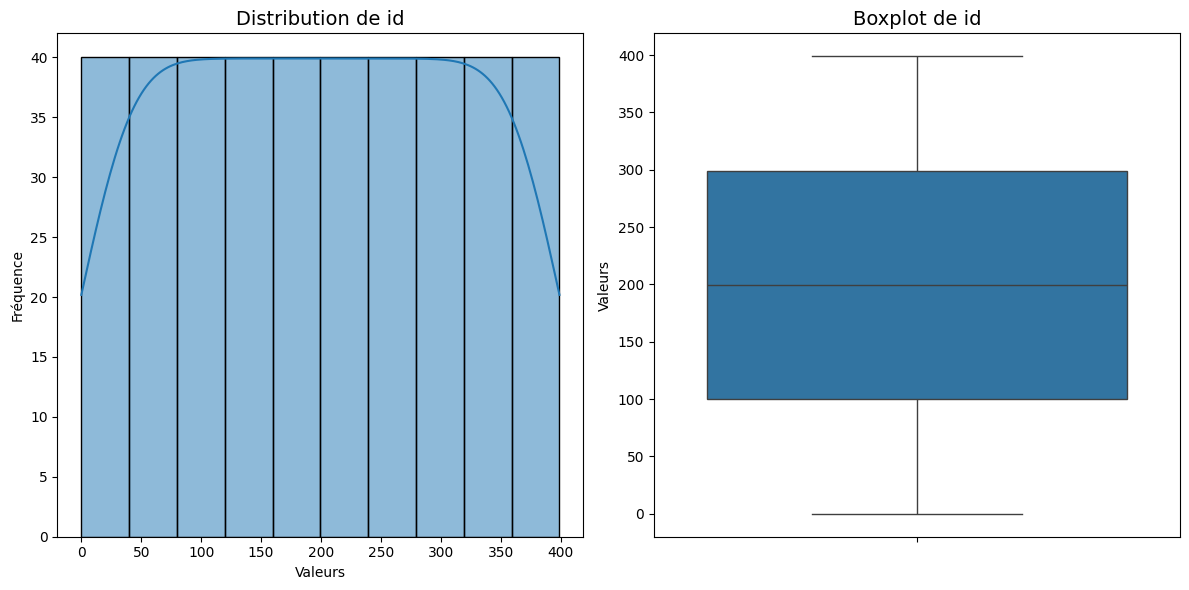

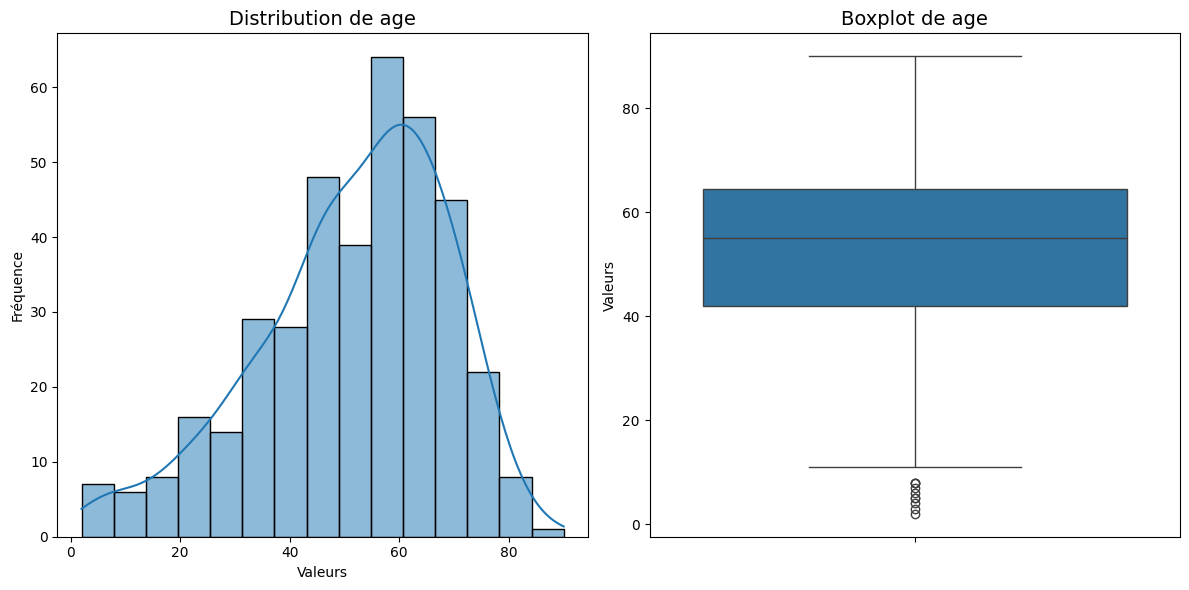

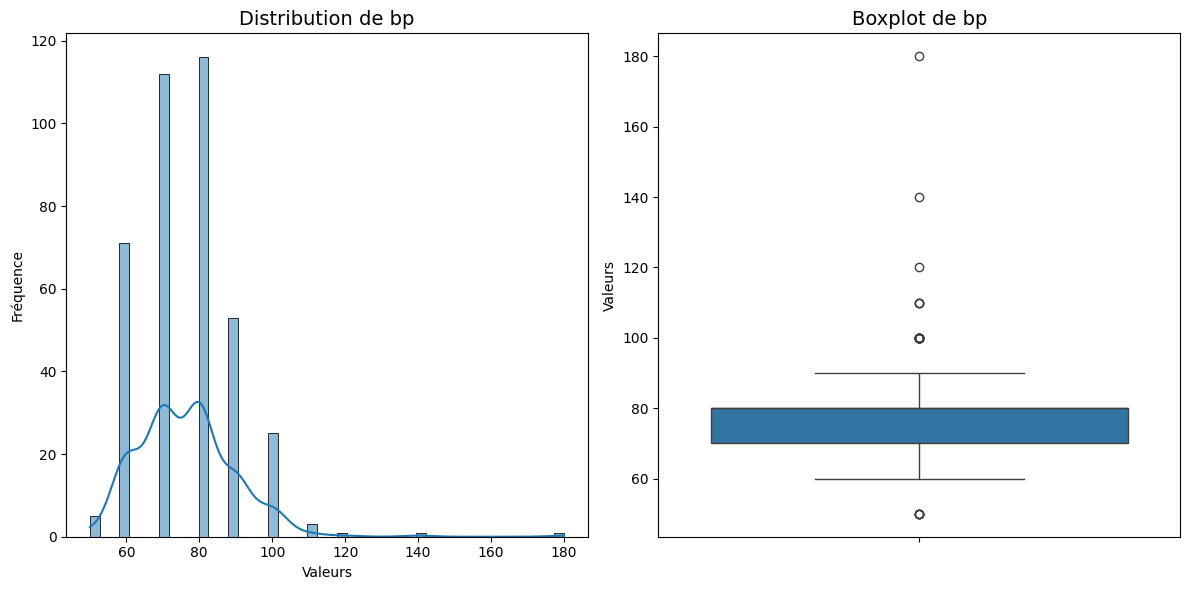

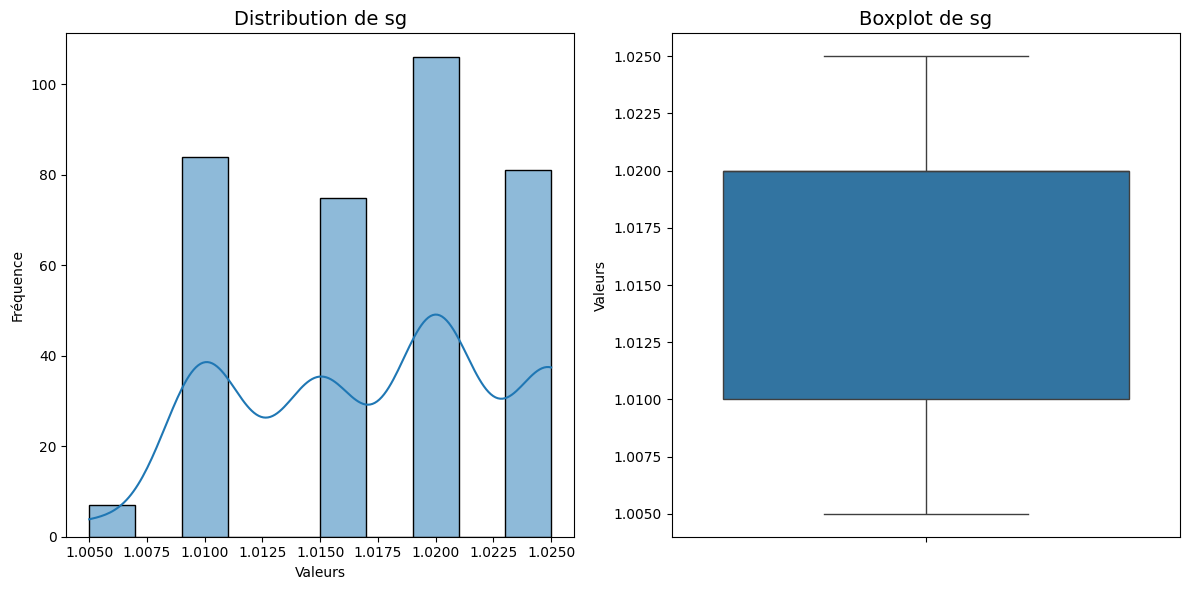

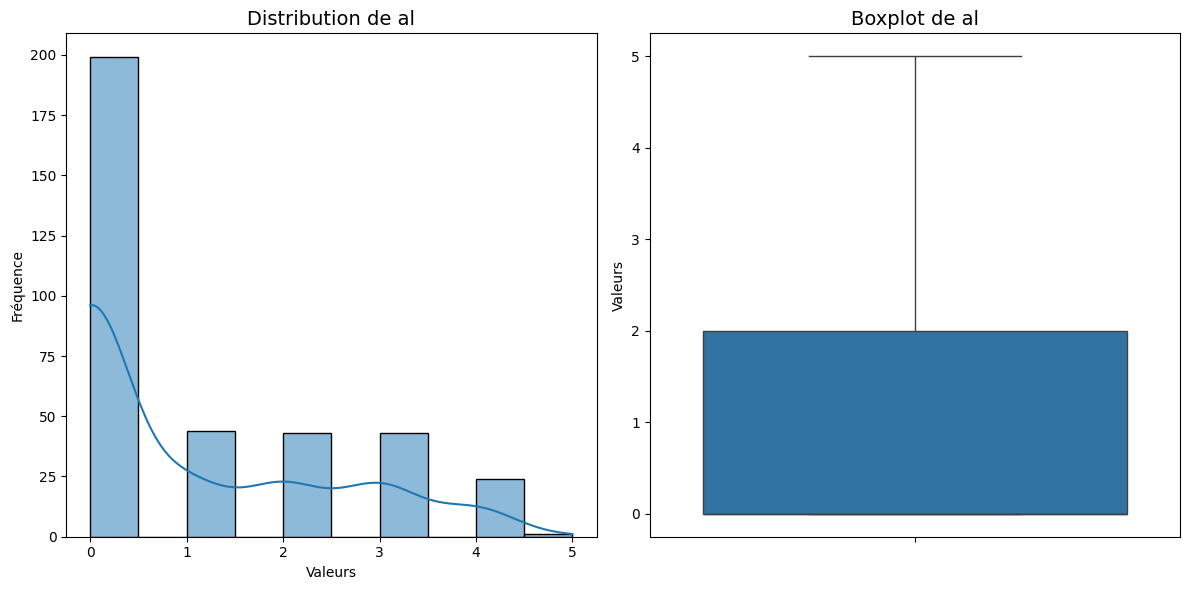

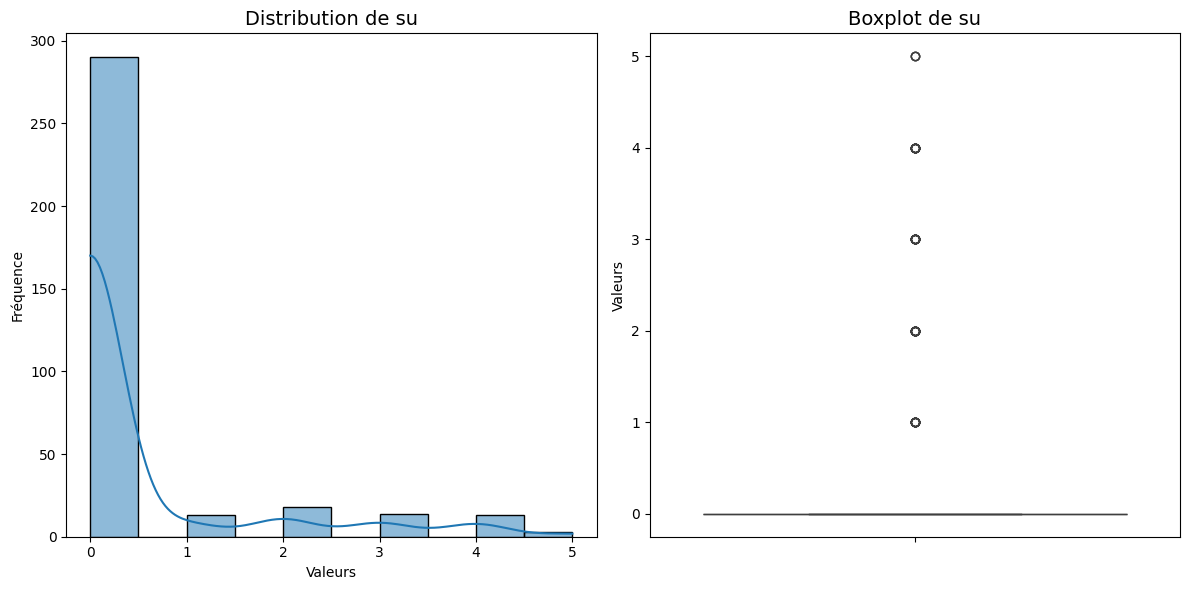

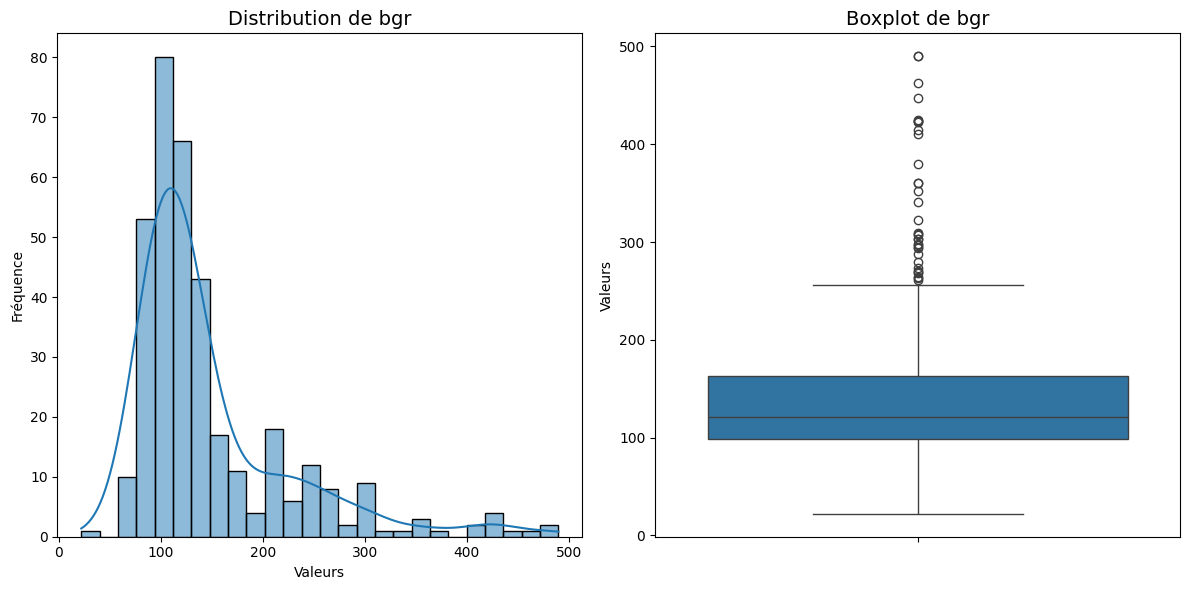

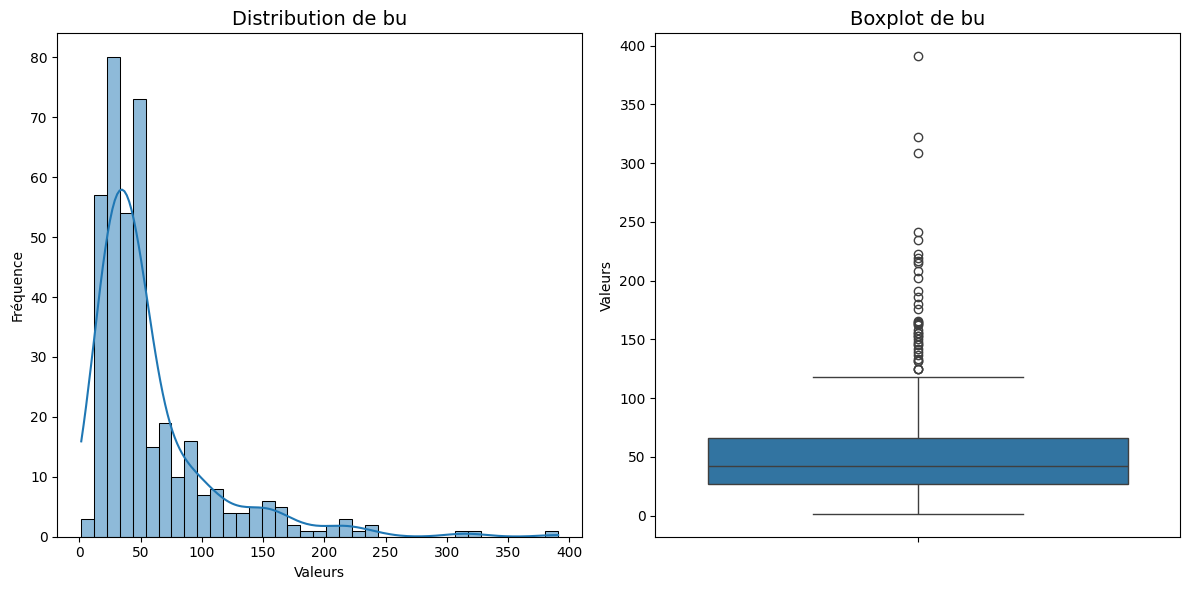

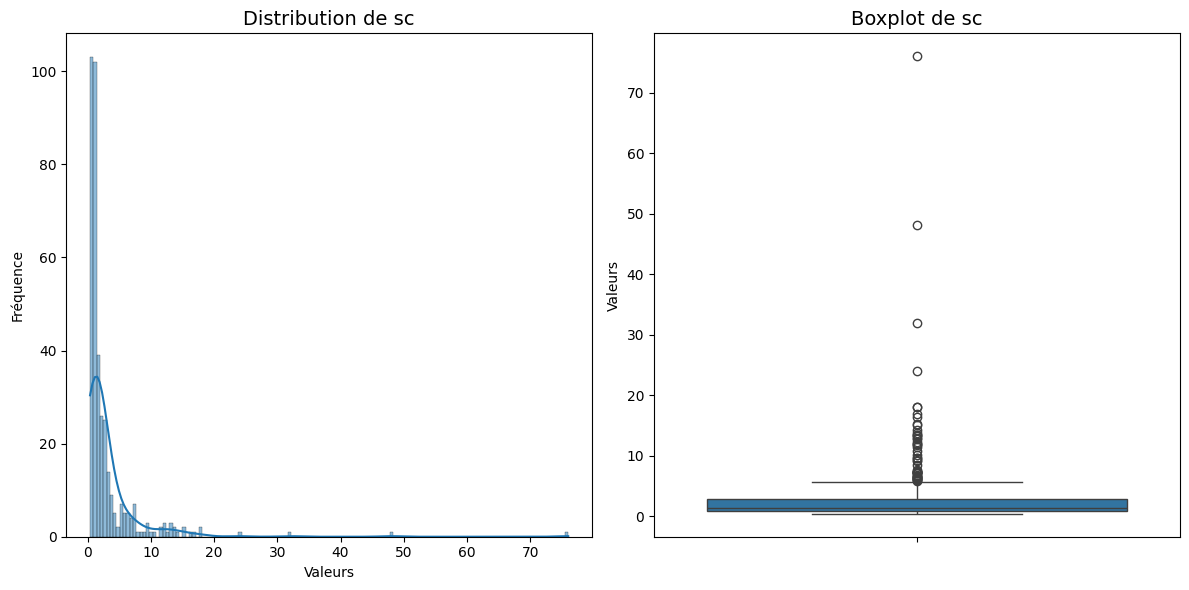

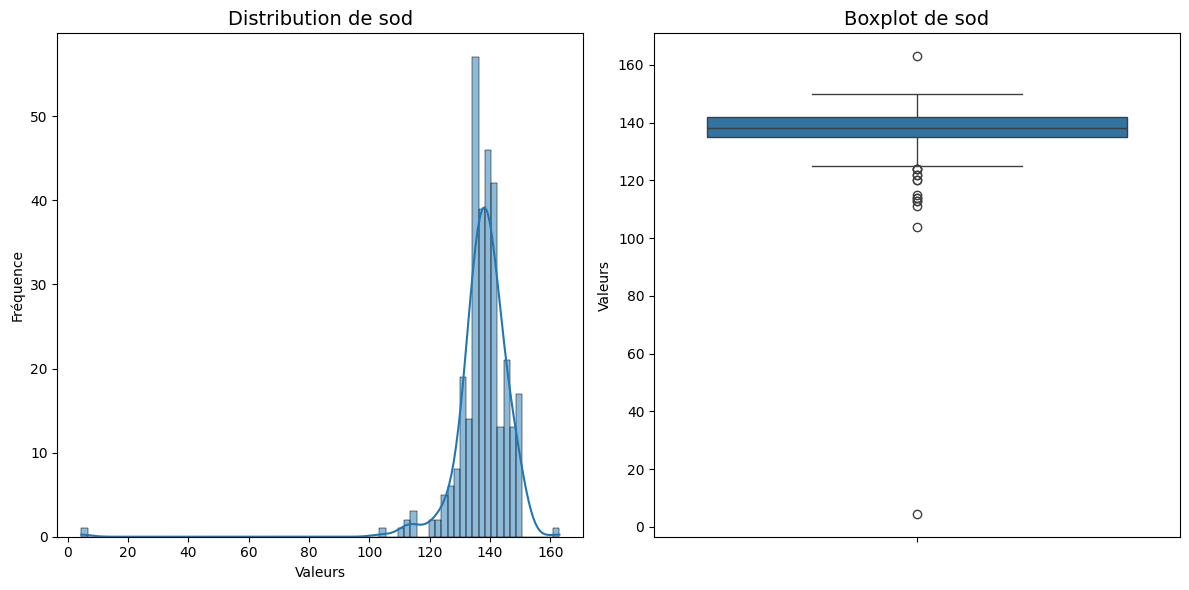

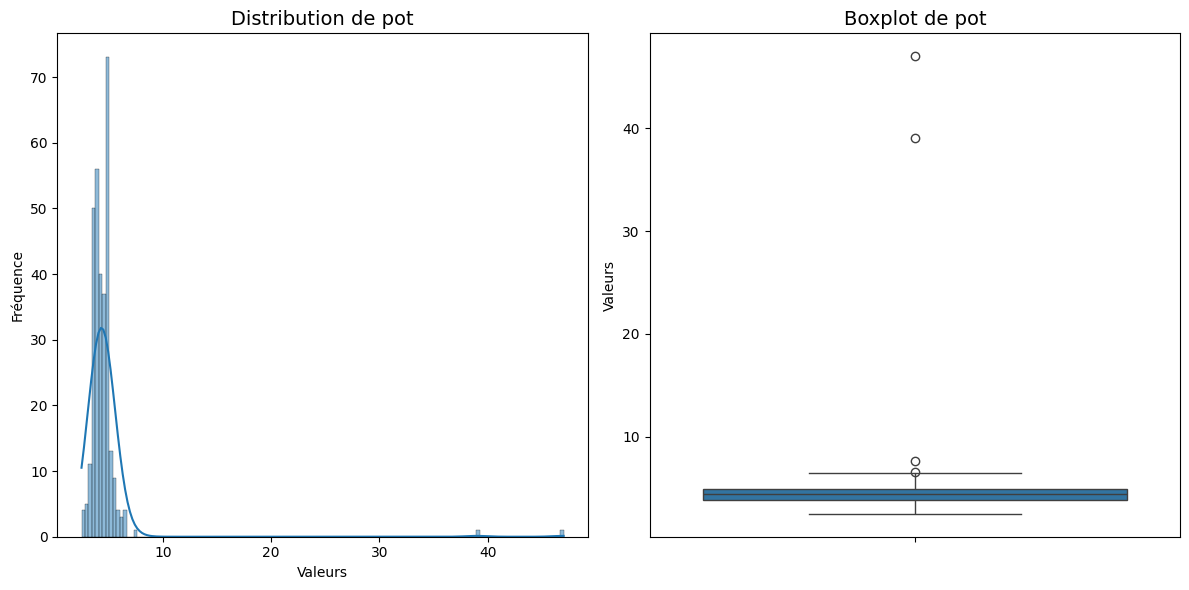

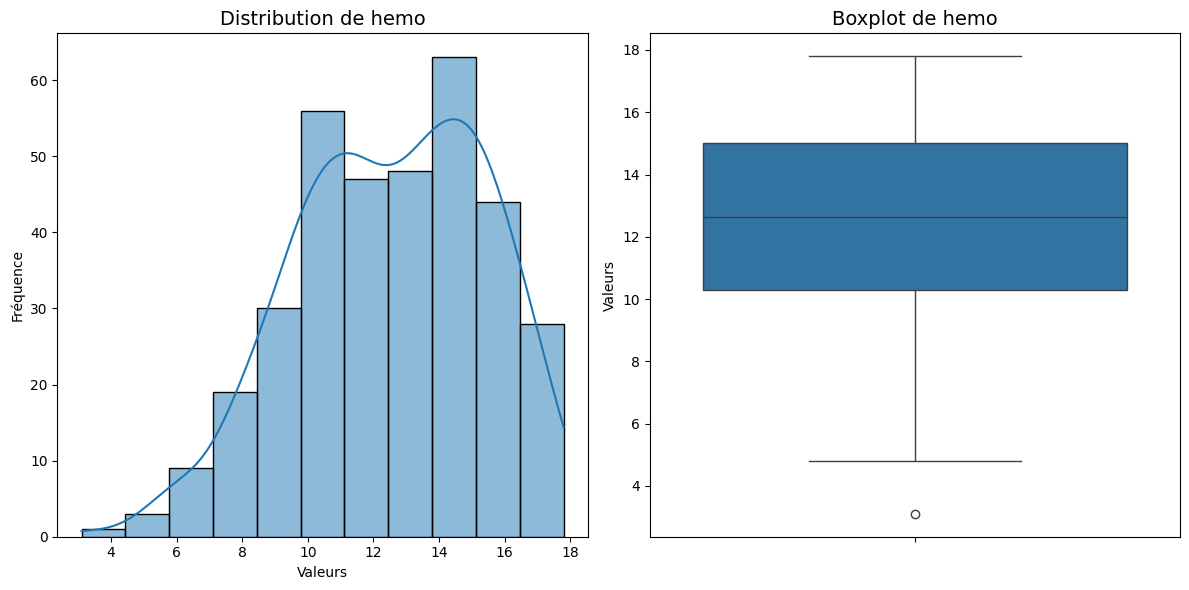

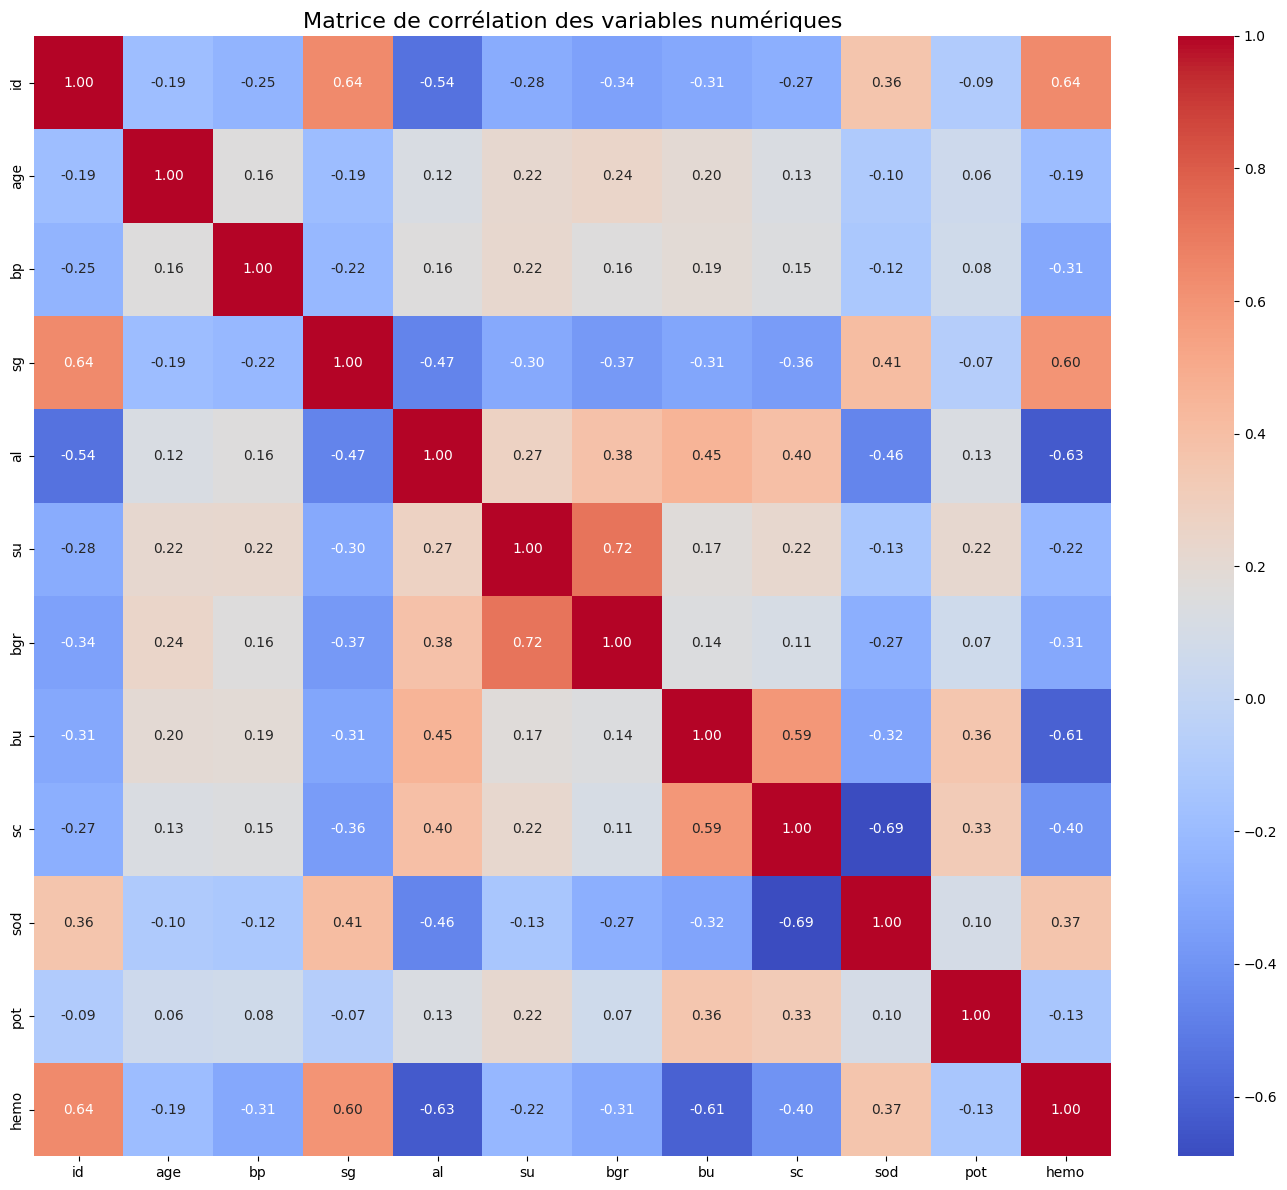

In [ ]:
# 1. Analyse des valeurs manquantes
df_clean = df.replace(['\t', '?', '', 'nan', 'NaN', 'na'], np.nan)

# Compter les valeurs manquantes
missing_values = df_clean.isnull().sum()
missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100 #la ligne serait plutot missing_percent = (missing_values / len(df_clean)) * 100
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage (%)': missing_percent.round(2)
})
print(missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Pourcentage (%)', ascending=False))

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 8))
plt.title('Pourcentage de valeurs manquantes par colonne', fontsize=16)
plt.bar(missing_df[missing_df['Valeurs manquantes'] > 0].index,
        missing_df[missing_df['Valeurs manquantes'] > 0]['Pourcentage (%)'])
plt.xticks(rotation=90)
plt.ylabel('Pourcentage de valeurs manquantes (%)')
plt.xlabel('Colonnes du dataset')
plt.tight_layout()
plt.savefig('missing_values.png')

# 2. Analyse des variables catégorielles
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    if not pd.isna(df_clean[col]).all():
        value_counts = df_clean[col].value_counts(dropna=False)
        print(f"\nDistribution de '{col}':")
        print(value_counts)

        # Visualisation pour les variables catégorielles
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(y=col, data=df_clean, order=value_counts.index[:10])
        plt.title(f'Distribution des catégories pour {col}', fontsize=14)
        plt.xlabel('Nombre d\'observations')
        plt.ylabel('Catégories')
        plt.tight_layout()
        plt.savefig(f'distribution_{col}.png')

# 3. Analyse des variables numériques
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_cols:
    print(f"\nStatistiques pour '{col}':")
    print(df_clean[col].describe())

    # Histogramme et boxplot
    plt.figure(figsize=(12, 6))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[col].dropna(), kde=True)
    plt.title(f'Distribution de {col}', fontsize=14)
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquence')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_clean[col].dropna())
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.ylabel('Valeurs')

    plt.tight_layout()
    plt.savefig(f'numeric_{col}.png')

# 4. Analyse de la variable cible (si présente)
target_col = 'class' if 'class' in df_clean.columns else None

if target_col:
    print(f"\nDistribution de la variable cible '{target_col}':")
    print(df_clean[target_col].value_counts(dropna=False))

    # Visualisation de la variable cible
    plt.figure(figsize=(10, 6))
    target_counts = df_clean[target_col].value_counts(dropna=False)
    target_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution de la variable cible {target_col}', fontsize=14)
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'observations')
    plt.tight_layout()
    plt.savefig('target_distribution.png')

# 5. Analyse des corrélations
correlation_matrix = df_clean.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# 6. Résumé
print(f"\nDimensions: {df.shape[0]} lignes x {df.shape[1]} colonnes")
print(f"Variables catégorielles: {len(categorical_cols)}")
print(f"Variables numériques: {len(numeric_cols)}")
print(f"Colonnes avec valeurs manquantes: {sum(missing_values > 0)}")

1. Conversion des données catégorielles en binaires
D'abord, nous identifions les colonnes qui contiennent des données catégorielles et les convertissons en valeurs binaires (0 et 1):

J'ai créé un dictionnaire binary_mappings qui contient les règles de conversion pour chaque colonne catégorielle connue dans le dataset kidney-disease:

Pour les colonnes comme 'rbc', 'pc': "normal" devient 1, "abnormal" devient 0
Pour 'pcc', 'ba': "present" devient 1, "notpresent" devient 0
Pour 'htn', 'dm', 'cad', 'pe', 'ane': "yes" devient 1, "no" devient 0
Pour 'appet': "good" devient 1, "poor" devient 0
Pour 'class' (la variable cible): "ckd" (chronic kidney disease) devient 1, "notckd" devient 0


Les valeurs sont d'abord nettoyées (espaces supprimés, conversion en minuscules) pour assurer la cohérence
La méthode map() de pandas est ensuite utilisée pour effectuer la conversion selon le dictionnaire défini

Cette conversion transforme les données textuelles en valeurs numériques, ce qui est essentiel pour la plupart des algorithmes de machine learning.
2. Imputation des valeurs manquantes
Après avoir converti toutes les colonnes en format numérique, nous appliquons une stratégie d'imputation en cascade pour les valeurs manquantes:

Essai avec la médiane:

Pour chaque colonne, nous calculons la médiane des valeurs existantes
La médiane est préférée à la moyenne car elle est moins sensible aux valeurs extrêmes
Si la médiane peut être calculée (assez de valeurs disponibles), nous l'utilisons pour remplacer toutes les valeurs manquantes de cette colonne


Fallback à la moyenne:

Si la médiane est elle-même NaN (peut arriver si trop peu de valeurs sont disponibles), nous essayons avec la moyenne
La moyenne est calculée et utilisée pour remplacer les valeurs manquantes


Dernier recours avec valeur par défaut:

Si ni la médiane ni la moyenne ne peuvent être calculées (par exemple, si presque toutes les valeurs sont manquantes), nous utilisons 0 comme valeur par défaut


Cas spécial des colonnes entièrement vides:

Pour les colonnes où toutes les valeurs sont manquantes, nous remplaçons directement par 0



Cette approche est progressive et adaptative, ce qui permet de traiter efficacement différents types de colonnes et différents niveaux de données manquantes.
Avantages de cette méthode

Elle est robuste face aux colonnes problématiques (comme celles mentionnées dans l'erreur : 'rbc', 'pc', 'pcc', 'ba', etc.)
Elle préserve la distribution générale des données en utilisant prioritairement la médiane
Elle garantit qu'aucune valeur manquante ne subsiste dans le dataset final, ce qui est essentiel pour la plupart des algorithmes de machine learning
La conversion binaire préalable simplifie l'interprétation future des résultats


In [ ]:
# Remplacer les valeurs problématiques par NaN
df = df.replace(['\t', '?', '', 'nan', 'NaN', 'na'], np.nan) #plus simplement df = df.replace(elm if type(elm)==str, np.nan)

# Première étape : Convertir les colonnes catégorielles en binaire
# Liste des colonnes catégorielles courantes dans le dataset kidney-disease
binary_mappings = {
    'rbc': {'normal': 1, 'abnormal': 0},
    'pc': {'normal': 1, 'abnormal': 0},
    'pcc': {'present': 1, 'notpresent': 0},
    'ba': {'present': 1, 'notpresent': 0},
    'htn': {'yes': 1, 'no': 0},
    'dm': {'yes': 1, 'no': 0},
    'cad': {'yes': 1, 'no': 0},
    'appet': {'good': 1, 'poor': 0},
    'pe': {'yes': 1, 'no': 0},
    'ane': {'yes': 1, 'no': 0},
    'class': {'ckd': 1, 'notckd': 0}
}

# Nettoyer et standardiser les valeurs textuelles
for col in df.select_dtypes(include=['object']).columns:
    if col in df.columns and not pd.isna(df[col]).all():
        df[col] = df[col].str.strip().str.lower() if df[col].dtype == 'object' else df[col]

# Appliquer la conversion binaire
for col, mapping in binary_mappings.items():
    if col in df.columns:
        # Convertir selon le mapping
        df[col] = df[col].map(mapping)
        # Si certaines valeurs n'étaient pas dans le mapping, elles sont devenues NaN
        print(f"Conversion binaire pour {col} - valeurs NaN: {df[col].isna().sum()}")

# Tentative de conversion des autres colonnes en numérique
for col in df.columns:
    if col not in binary_mappings and df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Colonne {col} convertie en numérique")
        except:
            print(f"Échec de conversion numérique pour {col}")

# Deuxième étape : Imputation des valeurs manquantes avec la médiane pour toutes les colonnes
for col in df.columns:
    # Vérifier si la colonne contient au moins une valeur non-NaN
    if not pd.isna(df[col]).all():
        # Calculer la médiane pour toutes les colonnes (maintenant numériques)
        median_value = df[col].median()
        if pd.notna(median_value):
            df[col] = df[col].fillna(median_value)
            print(f"Colonne {col} - imputation avec médiane: {median_value}")
        else:
            # Si la médiane est NaN (peut arriver si trop peu de valeurs)
            mean_value = df[col].mean()
            if pd.notna(mean_value):
                df[col] = df[col].fillna(mean_value)
                print(f"Colonne {col} - imputation avec moyenne: {mean_value}")
            else:
                # Si tous les calculs échouent, utiliser 0
                df[col] = df[col].fillna(0)
                print(f"Colonne {col} - imputation avec 0 (par défaut)")
    else:
        # Pour les colonnes entièrement vides
        df[col] = df[col].fillna(0)
        print(f"Colonne {col} entièrement vide - remplacée par 0")

# Vérifier le résultat après nettoyage
print("\nAperçu des données après nettoyage:")
print(df.head())
print("\nInformations après nettoyage:")
print(df.info())
print("\nVérification des valeurs manquantes restantes:")
print(df.isnull().sum())

# Analyse statistique finale
print("\nStatistiques descriptives après conversion et imputation:")
print(df.describe())

# Sauvegarder le dataset nettoyé
df.to_csv('kidney_disease_cleaned_binary.csv', index=False)
print("\nFichier nettoyé sauvegardé sous 'kidney_disease_cleaned_binary.csv'")

# Option: afficher la distribution des valeurs pour vérifier
print("\nDistribution des valeurs pour quelques colonnes principales:")
for col in df.columns[:5]:  # Limité aux 5 premières colonnes
    print(f"\nDistribution de {col}:")
    print(df[col].value_counts())

Conversion binaire pour rbc - valeurs NaN: 152
Conversion binaire pour pc - valeurs NaN: 65
Conversion binaire pour pcc - valeurs NaN: 4
Conversion binaire pour ba - valeurs NaN: 4
Conversion binaire pour htn - valeurs NaN: 2
Conversion binaire pour dm - valeurs NaN: 2
Conversion binaire pour cad - valeurs NaN: 2
Conversion binaire pour appet - valeurs NaN: 1
Conversion binaire pour pe - valeurs NaN: 1
Conversion binaire pour ane - valeurs NaN: 1
Colonne pcv convertie en numérique
Colonne wc convertie en numérique
Colonne rc convertie en numérique
Colonne classification convertie en numérique
Colonne id - imputation avec médiane: 199.5
Colonne age - imputation avec médiane: 55.0
Colonne bp - imputation avec médiane: 80.0
Colonne sg - imputation avec médiane: 1.02
Colonne al - imputation avec médiane: 0.0
Colonne su - imputation avec médiane: 0.0
Colonne rbc - imputation avec médiane: 1.0
Colonne pc - imputation avec médiane: 1.0
Colonne pcc - imputation avec médiane: 0.0
Colonne ba - i

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
